In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df["peakrpm"].isnull().value_counts()


peakrpm
False    205
Name: count, dtype: int64

In [57]:
def linear_Model(X_train,W,b=0):
#     f=np.zeros(X_train.shape[0])
    

#     for j in range(X_train.shape[1]):
        
#         f+=X_train[:,j]*W[j]
#     f+=b

#     return f
    return np.dot(X_train,W)+b

In [62]:
X_train=np.array(df[["peakrpm","citympg","horsepower"]])

W=np.array([1,1,1])

b=0
Y_train=df["price"]
linear_Model(X_train,W,b=0)


array([5132, 5132, 5173, 5626, 5633, 5629, 5629, 5629, 5657, 5676, 5924,
       5924, 4392, 4392, 4391, 5598, 5598, 5597, 5195, 5508, 5508, 5605,
       5599, 5626, 5599, 5599, 5599, 5626, 5112, 5164, 4907, 6107, 5598,
       6106, 6106, 6106, 6106, 5913, 5913, 5913, 5913, 5925, 5625, 4902,
       5508, 5508, 5114, 4941, 4941, 5275, 5098, 5099, 5099, 5099, 5099,
       6118, 6118, 6118, 6151, 4910, 4910, 4910, 4910, 4750, 4910, 5139,
       4303, 4495, 4495, 4495, 4495, 4921, 4921, 4698, 4698, 5194, 5605,
       5599, 5599, 5626, 5639, 5113, 5164, 5164, 5164, 5113, 5113, 5639,
       5639, 5300, 4900, 5300, 5300, 5300, 5300, 5300, 5300, 5300, 5300,
       5324, 5324, 5369, 5369, 5371, 5379, 5417, 5379, 5116, 4273, 5116,
       4270, 5114, 4273, 5114, 4270, 5116, 4273, 5760, 5605, 5626, 5599,
       5599, 5599, 5112, 5164, 5662, 6124, 6124, 6124, 6055, 5213, 5213,
       5381, 5381, 5381, 5381, 5679, 5679, 5000, 4499, 4499, 4914, 4510,
       5320, 4906, 4935, 4910, 5319, 4905, 4934, 48

In [63]:
def Compute_Cost(X_train,Y_train,W,b=0):
    m=X_train.shape[0]
#     Error=0
#     for i in range(m):
#         Error+=(Y_train[i]-linear_Model(X_train[i],W,b))**2
#     return Error/(2*m)
        
    return (1/(2*m))*np.sum((Y_train-linear_Model(X_train,W,b))**2)


In [64]:
def gradient(X_train,Y_train,W,b=0):
    m=X_train.shape[0]
#     n=X_train.shape[1]
#     dj_dw=np.zeros(len(W))
#     dj_db=0

#     for i in range(m):
#         for j in range(n):
#             dj_dw[j]+=(Y_train[i]-linear_Model(X_train,W,b)[i])*X_train[i][j]*(-1)       
#         dj_db+=(Y_train[i]-linear_Model(X_train,W,b)[i])*(-1)
#     return dj_dw/m,dj_db/m
    
    dj_db=(1/m)*np.sum((Y_train-linear_Model(X_train,W,b))*(-1))
    dj_dw=(1/m)*np.dot((linear_Model(X_train,W,b)-Y_train),X_train)
    return dj_dw,dj_db

In [8]:

X_train=np.array([[1,2,3],[4,5,6],[7,8,9]])
Y_train=np.array([12,17,19])
W=np.array([1,2,3],dtype=float)
print(gradient(X_train,Y_train,W,b))
W-=0.001*gradient(X_train,Y_train,W,b=0)[0]


(array([ 93., 109., 125.]), 16.0)


In [9]:
W-=0.001*gradient(X_train,Y_train,W,b=0)[0]
gradient(X_train,Y_train,W,b=0)

(array([ 76.556502,  89.380291, 102.20408 ]), 12.823789)

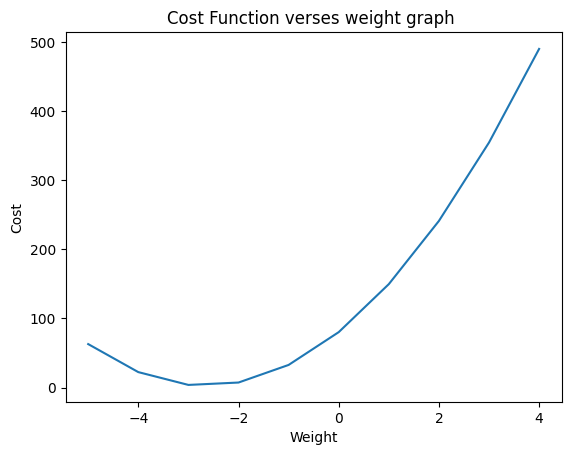

In [10]:
def plot_Cost_W(X_train,Y_train,W,j_feature,b,W_list=np.arange(-2500,2500)):
    W_copy=W.copy()
    cost_list=[]
    for i in range(len(W_list)):
        W_copy[j_feature-1]=W_list[i]
        cost_list.append(Compute_Cost(X_train,Y_train,W_copy,b))
    plt.plot(W_list,cost_list)
    plt.title("Cost Function verses weight graph ")
    plt.xlabel("Weight")
    plt.ylabel("Cost")
    plt.show()
plot_Cost_W(X_train,Y_train,W,j_feature=1,b=0,W_list=np.arange(-5,5))

In [11]:
def plot_Linear(X_train,j_feature,Y_train,W,b=0):
    
    plt.scatter(X_train,Y_train,marker='x', c='r')
    plt.plot(X_train,linear_Model(X_train,W,b))
    plt.title("Linear Model")
    plt.xlabel("Input X")
    plt.ylabel("Output Y")
    plt.show()
plot_Linear(X_train,Y_train,W,b=0)

TypeError: plot_Linear() missing 1 required positional argument: 'W'

In [12]:

def gradient_desent(X_train,Y_train,W,b=0,Alpha=0.1,iterations=1000):
    cost_list=[Compute_Cost(X_train,Y_train,W,b)]
    W_list=[W]
    j=0
    n=X_train.shape[1]
    for i in range(iterations):
        
        dj_dw,dj_db=gradient(X_train,Y_train,W,b)
        
#         for j in range(n):
#             W[j]-=Alpha*dj_dw[j]
        W-=Alpha*dj_dw
        b-=Alpha*dj_db
        cost_list.append(Compute_Cost(X_train,Y_train,W,b))
        W_list.append(W)
        j+=1
        
        
        if (i%(iterations/10)==0):
            
            print("The Cost funtion will equal ",Compute_Cost(X_train,Y_train,W,b))
            print("the W  have reached equal ",W)
            
            if (cost_list[j]<cost_list[j-1]):
                print("the cost function is decrease")
            else:
                print("the cost function is increase ya 5ayb")
            
    
    plot_Cost_W(X_train,Y_train,W,j_feature=1,b=0,W_list=np.arange(-5,5))
    plt.plot(np.arange(iterations),cost_list[:iterations])

The Cost funtion will equal  135.65250437077393
the W  have reached equal  [0.82262923 1.79229611 2.76196298]
the cost function is decrease
The Cost funtion will equal  133.22970952328308
the W  have reached equal  [0.8150091  1.78340047 2.75179184]
the cost function is decrease
The Cost funtion will equal  130.8527041369888
the W  have reached equal  [0.80745955 1.77458907 2.7417186 ]
the cost function is decrease
The Cost funtion will equal  128.52062252534398
the W  have reached equal  [0.79997991 1.76586112 2.73174233]
the cost function is decrease
The Cost funtion will equal  126.23261536833094
the W  have reached equal  [0.79256951 1.75721581 2.72186211]
the cost function is decrease
The Cost funtion will equal  123.98784940303952
the W  have reached equal  [0.7852277  1.74865236 2.71207703]
the cost function is decrease
The Cost funtion will equal  121.78550712010107
the W  have reached equal  [0.77795382 1.74017    2.70238618]
the cost function is decrease
The Cost funtion will

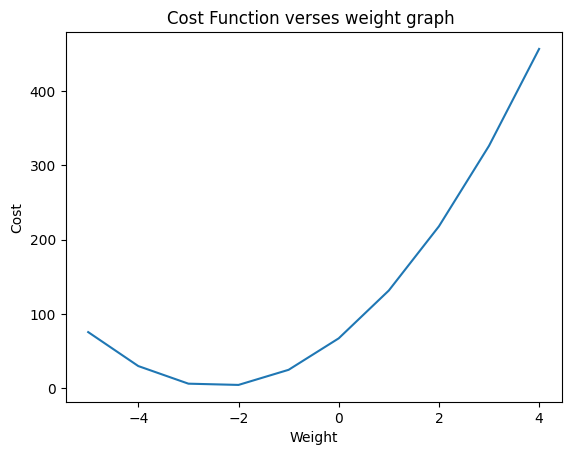

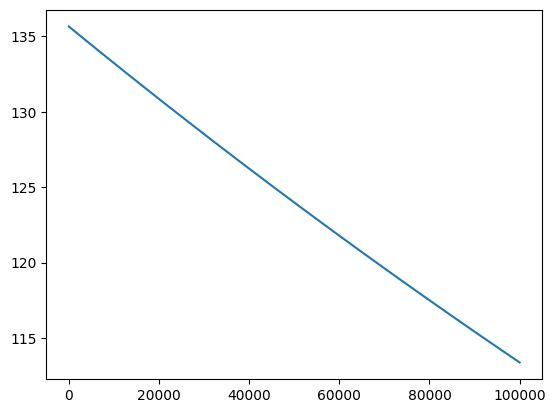

In [13]:
gradient_desent(X_train,Y_train,W,b=0,Alpha=0.00000001,iterations=100000)